Assignment 1

1.	Fit a linear regression model for the sklearn dataset California housing. In this task, you do not need to consider the interaction of the variables. (i.e. no X1X2 or X1X3, etc. in the model) You have to consider the following items:
1a)	Data preprocessing: Correlation of the variables and VIF.

Note: This question is only testing if you know how to perform Linear Regression. Error rate is not considered in this question.
Part of the code will be provided to you.



In [ ]:
from sklearn import datasets
data = datasets.fetch_california_housing()

print(data.keys())
#print(data.DESCR)

# Import pandas
import pandas as pd

# display all columns
pd.set_option('display.max_columns', None)

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Show number of NULL count
df.info()

##########################################################
## Correlation and VIF

#VIF = Variance Inflation Factor

print("Correlation of the dataset\n",df.corr())

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Correlation of the dataset
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766  \
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -

,Independent Features,VIF Scores
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_val(data_frame):
    vif_attr = pd.DataFrame()
    vif_attr["Variable"] = data_frame.columns
    vif_attr["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_attr

vif_df = vif_val(df)
print(vif_df)

     Variable         VIF
0      MedInc   19.624998
1    HouseAge    7.592663
2    AveRooms   47.956351
3   AveBedrms   45.358192
4  Population    2.936078
5    AveOccup    1.099530
6    Latitude  568.497332
7   Longitude  640.064211
8      target    9.285659


1b)	Standardization of variables.


In [ ]:
# Standardize columns
from sklearn.preprocessing import StandardScaler

feature_columns = df.columns[:]

scaler = StandardScaler()

df[feature_columns] = scaler.fit_transform(df[feature_columns])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


1c)	Split the data into training and testing datasets.


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (14448, 8)
Shape of X_test: (6192, 8)
Shape of y_train: (14448,)
Shape of y_test: (6192,)


1d)	Show the model summary (i.e. include R-square, Adjusted R-squared, Coefficients etc.). Plot the Residual error.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model




import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              2797.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:19:49   Log-Likelihood:                         -13738.
No. Observations:               14448   AIC:                                  2.749e+04
Df Residuals:                   14440   BIC:                                  2.755e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.7282      0.008     87.219      0.000       0.712       0.745
HouseAge       0.1050      0.006     18.078      0.000       0.094       0.116
AveRooms      -0.2513      0.016    -16.211      0.000      -0.282      -0.221
AveBedrms      0.2969      0.014     20.500      0.000       0.268       0.325
Population    -0.0031      0.006     -0.559      0.576      -0.014       0.008
AveOccup      -0.0339      0.005     -7.075      0.000      -0.043      -0.025
Latitude      -0.7635      0.016    -47.829      0.000      -0.795      -0.732
Longitude     -0.7406      0.016    -47.144      0.000      -0.771      -0.710
==============================================================================
Omnibus:                     2901.548   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7932.534
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.925   Cond. No.                         6.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

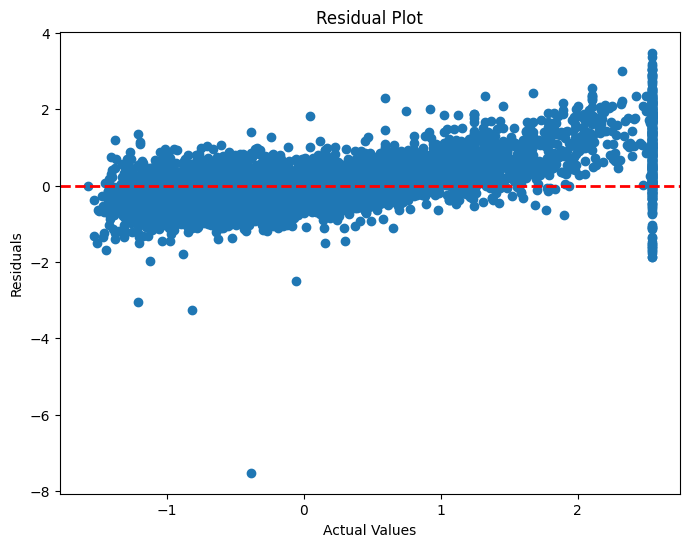

In [ ]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

1e)	By backward elimination, select the features by using Ridge regularization.


In [ ]:
from sklearn.linear_model import RidgeCV

alpha_val = [0.1, 1.0, 10.0]
ridge_cv_val = RidgeCV(alphas=alpha_val, store_cv_values=True)

ridge_cv_val.fit(X_train, y_train)

optimal_alpha_val = ridge_cv_val.alpha_
print("Optimal alpha:", optimal_alpha_val)

coefficients_val = ridge_cv_val.coef_
feature_importance_val = abs(coefficients_val)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_val})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n",feature_importance_df)


Optimal alpha: 10.0
Feature Importance:
       Feature  Importance
6    Latitude    0.756064
7   Longitude    0.733113
0      MedInc    0.727654
3   AveBedrms    0.294015
2    AveRooms    0.249213
1    HouseAge    0.105802
5    AveOccup    0.033892
4  Population    0.002870


1f) By backward elimination, select the features by using LASSO regularization.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv_val = LassoCV(alphas=alpha_val, cv=5)

lasso_cv_val.fit(X_train, y_train)

optimal_alpha_val = lasso_cv_val.alpha_
print("Optimal alpha:", optimal_alpha_val)

coefficients_lcv_val = lasso_cv_val.coef_
selected_features_lcv = X.columns[coefficients_lcv_val != 0]

print("Selected Features:\n",selected_features_lcv)


Optimal alpha: 0.1
Selected Features:
 Index(['MedInc', 'HouseAge'], dtype='object')


Q2. Fit a logistic regression model for the sklearn dataset Breast Cancer. In this task, you do not need to consider the interaction of the variables. (i.e. no X1X2 or X1X3, etc. in the model) You have to consider the following items:
2a)	Data preprocessing: Correlation of the variables and VIF.

Note: This question is only testing if you know how to perform Logistic Regression. Error rate is not considered in this question.
Part of the code will be provided to you.


In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()

## Correlation and VIF

pd.set_option('display.max_columns', None)

df1 = pd.DataFrame(data.data, columns=data.feature_names)
df1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
#correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
#VIF

vif_df1 = vif_val(df1)
print(vif_df1)

                   Variable           VIF
0               mean radius  63306.172036
1              mean texture    251.047108
2            mean perimeter  58123.586079
3                 mean area   1287.262339
4           mean smoothness    393.398166
5          mean compactness    200.980354
6            mean concavity    157.855046
7       mean concave points    154.241268
8             mean symmetry    184.426558
9    mean fractal dimension    629.679874
10             radius error    236.665738
11            texture error     24.675367
12          perimeter error    211.396334
13               area error     72.466468
14         smoothness error     26.170243
15        compactness error     44.919651
16          concavity error     33.244099
17     concave points error     53.698656
18           symmetry error     37.176452
19  fractal dimension error     27.532631
20             worst radius   9674.742602
21            worst texture    343.004387
22          worst perimeter   4487

2b)	Do you need to do Standardization for all variables?


## Study data here

Yes, as we have average and mean values it is best suited to apply standardization to all variables to ensure all variables are on same scale.

2c)	Include all variables?


In [ ]:
feature_columns = df1.columns[:-1]

scaler = StandardScaler()

df1[feature_columns] = scaler.fit_transform(df1[feature_columns])
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,0.11890
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.08902
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.08758
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,0.17300
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,0.07678


2d)	Split the data into training and testing datasets and train the model.


In [ ]:
X1 = df1.iloc[:,0:-1]
y1 = df1.iloc[:,-1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1234)

print("Shape of X_train:", X_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of y_train:", y_train1.shape)
print("Shape of y_test:", y_test1.shape)

Shape of X_train: (398, 29)
Shape of X_test: (171, 29)
Shape of y_train: (398,)
Shape of y_test: (171,)


In [ ]:
scaler = StandardScaler()

#fit_transform() method combines the functionalities of both fit() and transform() methods in one step
X_train1 = scaler.fit_transform(X_train1)

#transform() method helps in transforming the data into a form that is more suitable for the model.
X_test1 = scaler.transform(X_test1)


Given the ROC curve and the optimal threshold.


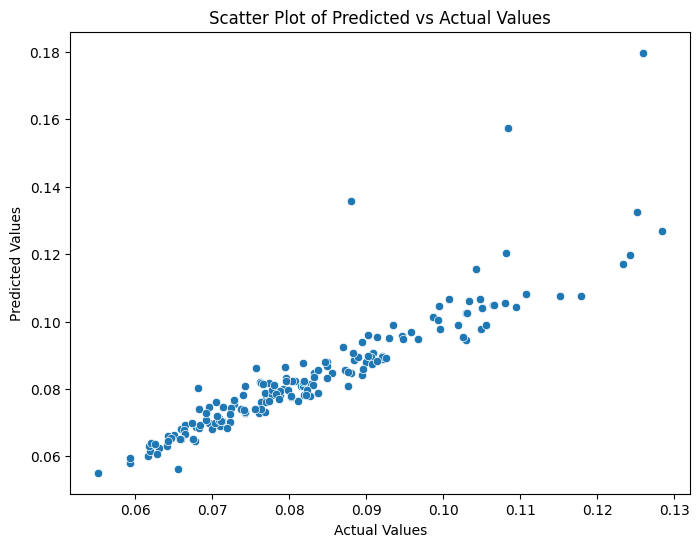

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
import seaborn as sns

linear_reg = LinearRegression()
linear_reg.fit(X_train1, y_train1)

# Predict the probabilities for the test data
#y_scores = log_reg.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC area
#fpr, tpr, thresholds = roc_curve(y_test1, y_scores)
#roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
#plt.show()
y_pred = linear_reg.predict(X_test1)

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test1, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Calculate the distance to the top-left corner for each point on the ROC curve
#distances = np.sqrt((1 - tpr)**2 + fpr**2)

# Find the optimal threshold: the one with the minimum distance
#min_idx = np.argmin(distances)
#optimal_threshold = thresholds[min_idx]

#print("Optimal threshold (closest to top-left):", optimal_threshold)

2e) Calculate the confusion matrix with the optimal threshold.

In [ ]:
from sklearn.metrics import confusion_matrix



Q3. Fit a decision tree model for the sklearn dataset diabetes. You have to consider the following items:
3a)	Split the data into training and testing datasets.

Note: This question is only testing if you know how to perform Decision Tree. Error rate is not considered in this question.
Part of the code will be provided to you.

In [ ]:
from sklearn import datasets
from sklearn import datasets
data = datasets.load_diabetes()
pd.set_option('display.max_columns', None)
df2 = pd.DataFrame(data.data, columns=data.feature_names)

df2

In [ ]:
#splitting the data
X2 = df2.iloc[:,0:-1]
y2 = df2.iloc[:,-1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train2.shape)
print("Shape of X_test:", X_test2.shape)
print("Shape of y_train:", y_train2.shape)
print("Shape of y_test:", y_test2.shape)


In [ ]:
print("Unique values in y_train2:", np.unique(y_train2))


3b)	Use Info Gain (Entropy) to build the model and calculate the confusion matrix.


In [ ]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

dt_classifier_val = DecisionTreeRegressor(criterion='absolute_error', random_state=42)

dt_classifier_val.fit(X_train2, y_train2)

y_pred2 = dt_classifier_val.predict(X_test2)

accuracy_val = accuracy_score(y_test2, y_pred2)
conf_matrix_val = confusion_matrix(y_test2, y_pred2)
class_report_val = classification_report(y_test2, y_pred2)

print("Accuracy:", accuracy_val)
print("Confusion Matrix:\n", conf_matrix_val)
print("Classification Report:\n", class_report_val)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier_val, filled=True, feature_names=X2.columns, class_names=True, rounded=True)
plt.show()



In [ ]:


#Predicting labels on the test set.


# confusion matrix
from sklearn.metrics import confusion_matrix

3c)	Repeat b) by using Gini-index to build the model.
